 The goal is to study the application of outlier detection methods in data and practice handling extreme values.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Let's load the data and conduct a preliminary analysis.

In [ ]:
data = pd.read_csv('glass.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


There are no missing values, and all the data is numerical.

Let's split the dataset into training and testing subsets.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]

In [ ]:
y = data['Type']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let's train a decision tree model using RandomForestClassifier on the training set.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(random_state=10)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

For the testing set, I will predict the glass type and compare it with the actual values by calculating the model's prediction accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred_rfc = rfc.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_rfc)

0.8837209302325582

I will handle outliers in the data. Let's visualize the distribution of values for each variable, examine the features for outliers using various methods, and remove the outliers.

<Axes: xlabel='RI'>

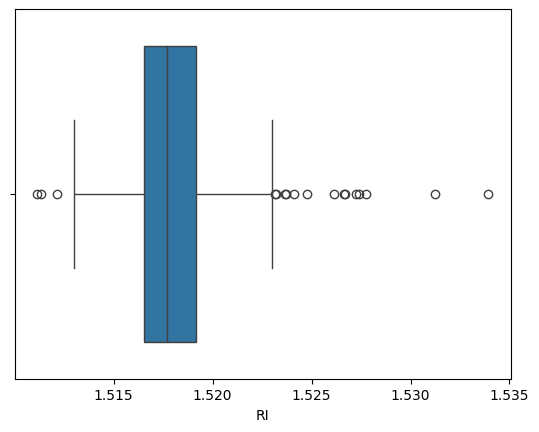

In [ ]:
sns.boxplot(x=data["RI"])

<Axes: xlabel='Na'>

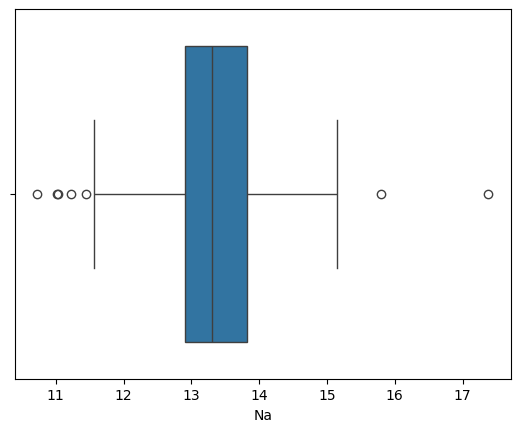

In [ ]:
sns.boxplot(x=data["Na"])

<Axes: xlabel='Mg'>

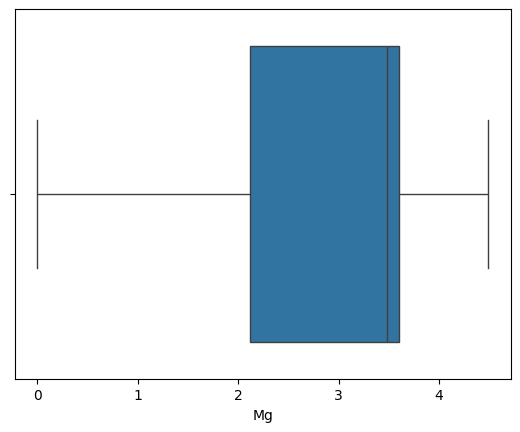

In [ ]:
sns.boxplot(x=data["Mg"])

<Axes: xlabel='Al'>

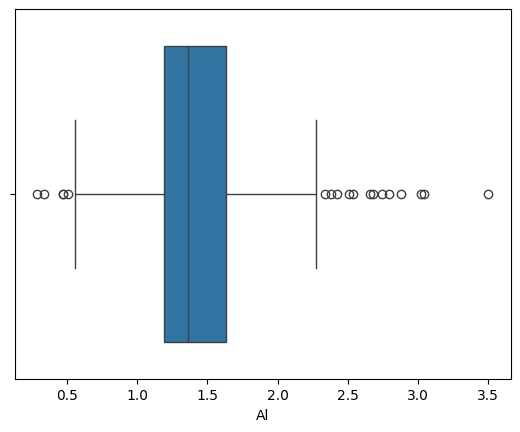

In [ ]:
sns.boxplot(x=data["Al"])

<Axes: xlabel='Si'>

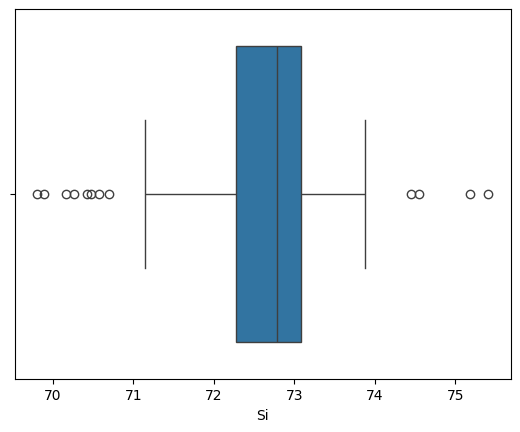

In [ ]:
sns.boxplot(x=data["Si"])

<Axes: xlabel='K'>

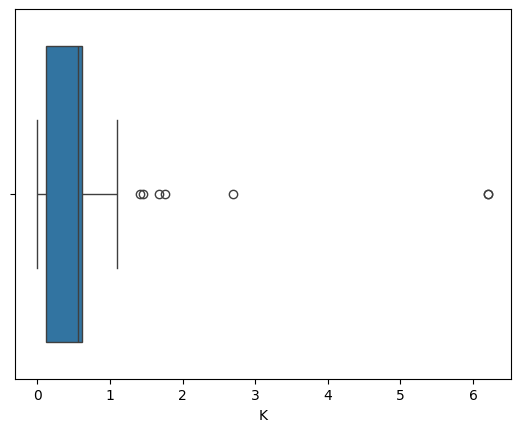

In [ ]:
sns.boxplot(x=data["K"])

<Axes: xlabel='Ca'>

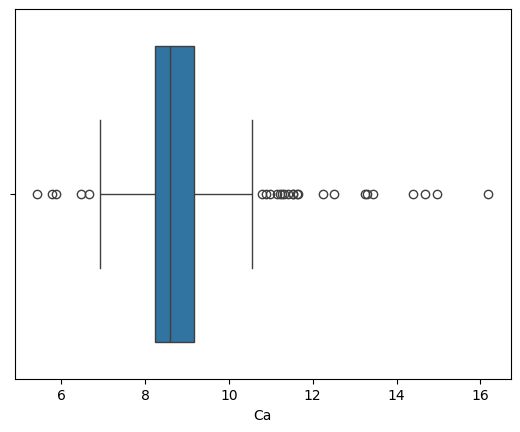

In [ ]:
sns.boxplot(x=data["Ca"])

<Axes: xlabel='Ba'>

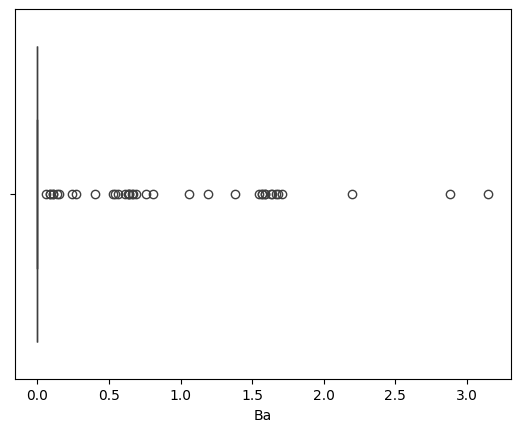

In [ ]:
sns.boxplot(x=data["Ba"])

<Axes: xlabel='Fe'>

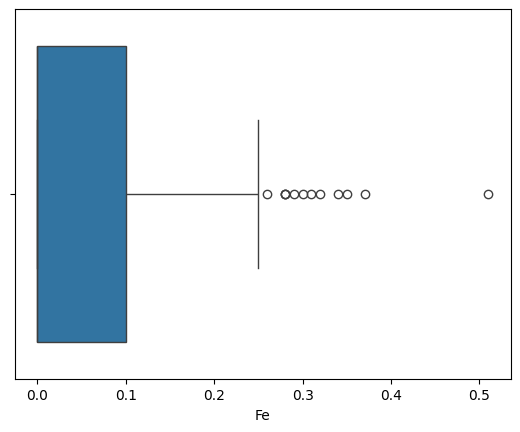

In [ ]:
sns.boxplot(x=data["Fe"])

The features Ri, Na, Mg, Al, Si, and Ca follow a normal distribution. There are no outliers for Mg.

In [ ]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [ ]:
ee = EllipticEnvelope()
ifo = IsolationForest()
lof = LocalOutlierFactor()
ocs = OneClassSVM()

In [ ]:
ee.fit(X)
ifo.fit(X)
lof.fit(X)
ocs.fit(X)

OneClassSVM()

In [ ]:
outliers_ee = ee.predict(X)
outliers_ee[outliers_ee==-1]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1])

In [ ]:
outliers_ifo = ifo.predict(X)
outliers_ifo[outliers_ifo==-1]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1])

In [ ]:
outliers_lof = lof.fit_predict(X)
outliers_lof[outliers_lof==-1]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1])

In [ ]:
outliers_ocsvm = ocs.predict(X)
outliers_ocsvm[outliers_ocsvm==-1]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1])

In [ ]:
data_outliers = {'Outliers EE': outliers_ee,
        'Outliers IF': outliers_ifo, 'Outliers LOF': outliers_lof, 'Outliers OCSVM': outliers_ocsvm}
df = pd.DataFrame(data_outliers)

<Axes: >

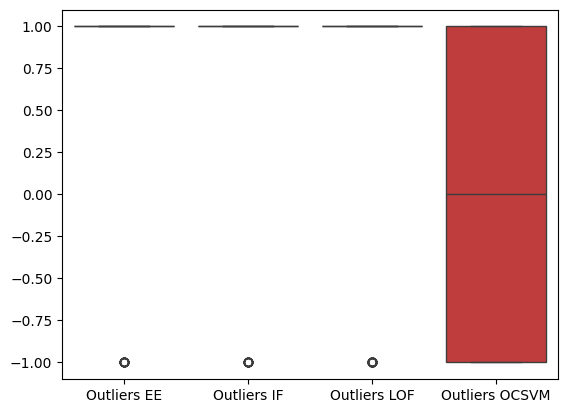

In [ ]:
sns.boxplot(data=df)

Let's remove the outliers identified by the boxplots for each feature.

In [ ]:
data1 = data[(data['RI'] < 1.523) & (data['RI'] > 1.511) & (data['Na'] < 15.1) & (data['Na'] > 11.5) & (data['Al'] < 2.3) & (data['Al'] > 0.6) & (data['Si'] < 74) & (data['Si'] > 71) & (data['K'] < 1.1) & (data['Ca'] < 11) & (data['Ca'] > 7) & (data['Fe'] < 0.25)]

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      153 non-null    float64
 1   Na      153 non-null    float64
 2   Mg      153 non-null    float64
 3   Al      153 non-null    float64
 4   Si      153 non-null    float64
 5   K       153 non-null    float64
 6   Ca      153 non-null    float64
 7   Ba      153 non-null    float64
 8   Fe      153 non-null    float64
 9   Type    153 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 13.1 KB


Approximately a quarter of the data was removed. That's quite a lot.

Let's retrain the RandomForestClassifier model on the training set. For the testing set, I will predict the glass type and compare it with the actual values by calculating the model's prediction accuracy.

In [ ]:
X1 = data1[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]

In [ ]:
y1 = data1['Type']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
rfc1 = RandomForestClassifier(random_state=10)

In [ ]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [ ]:
y_pred_rfc1 = rfc1.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_rfc1)

0.7096774193548387

Now the model's performance has decreased significantly, which suggests that removing all outliers does not always improve the model.